    Phishing is a kind of cybercrime where attacker pose as known or trusted entities and contact individuals through email, text or telephone and ask them to share sensitive information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Importing The Data

data = pd.read_csv("Phishing_Legitimate_full.csv")

converting the data

    Here we will convert the float64 and int64 values to type 32, to save memory usage.

In [3]:
data.shape

(10000, 50)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
float_col = data.select_dtypes('float64').columns
for x in float_col:
    data[x]=data[x].astype('float32')

In [6]:
int_col = data.select_dtypes('int64').columns
for x in int_col:
    data[x]=data[x].astype('int32')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [8]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


Summary Statistics:

    By using the describe method, we can see some of the columns have high variance , this is due to the fact that some of the column have bigger values and bigger ranges 

In [9]:
data.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Renaming column name for convenience

In [10]:
data.rename(columns={'CLASS_LABEL':'Label'},inplace=True)

In [11]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,Label
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


<AxesSubplot:ylabel='Label'>

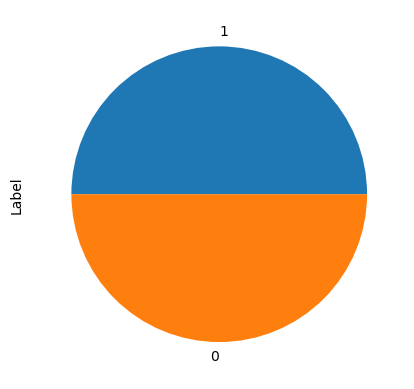

In [12]:
data['Label'].value_counts().plot(kind='pie')

Data is Balanced for Pishing and Non Pishing Label

.

Mutual info

    We will now use mutual information classifier to find non-linear and linear correlation between the features and "Label"


In [13]:
from sklearn.feature_selection import mutual_info_classif

In [14]:
x=data.drop(['id','Label'],axis=1)

In [15]:
y=data['Label']

In [16]:
discrete_features = x.dtypes ==int

In [17]:
mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      4.673976e-01
PctExtResourceUrls                    2.910239e-01
PctNullSelfRedirectHyperlinks         2.363445e-01
PctExtNullSelfRedirectHyperlinksRT    2.123850e-01
NumNumericChars                       1.326711e-01
FrequentDomainNameMismatch            1.254908e-01
ExtMetaScriptLinkRT                   1.175434e-01
NumDash                               1.140136e-01
SubmitInfoToEmail                     7.802617e-02
NumDots                               6.553700e-02
PathLength                            6.413269e-02
QueryLength                           5.818557e-02
PathLevel                             5.543887e-02
InsecureForms                         5.508096e-02
UrlLength                             5.263855e-02
NumSensitiveWords                     4.180522e-02
NumQueryComponents                    3.361768e-02
PctExtResourceUrlsRT                  2.831059e-02
IframeOrFrame                         2.805496e-02
HostnameLength                 

In [18]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width,scores)
    plt.yticks(width,ticks)
    plt.title("Mi Scores")

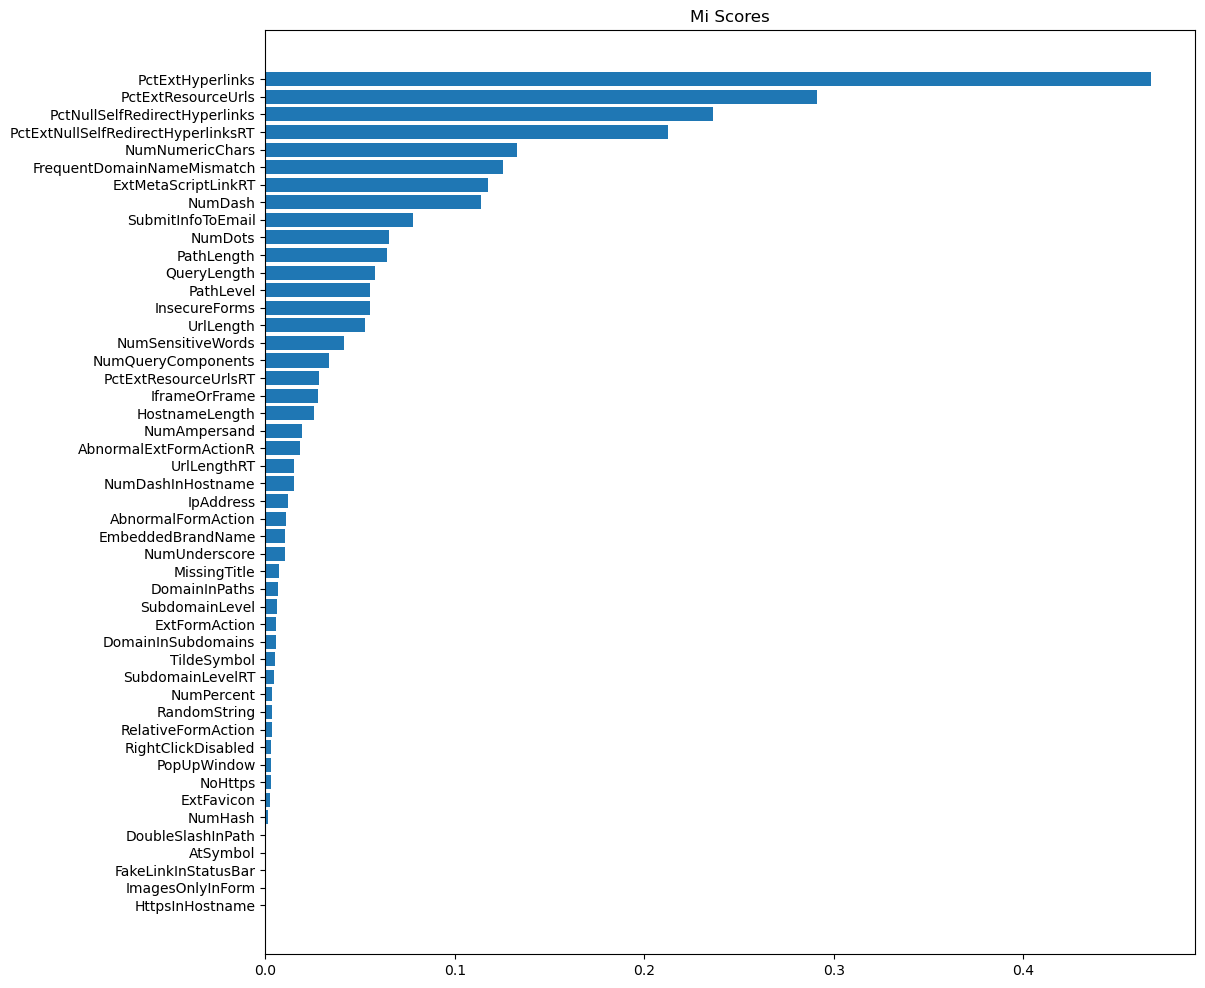

In [19]:
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)

Prediction

    We will first use logistic regression as for baseline, then try to beat the baseline using random forest classifer

    Our evaluation metrics will be accuracy, precision, recall and f1 score

    Below we import all the required modules

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as Rfc 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Train logistic models

    This method is used to perform a repetative training process using logistic regression model, the main purpose for this is to find the optimal number of features that can be used to find the best fitted model without adjusting much of the hyperparameters, hence the idea here is to go with Data-Centric training, basically the method takes number of top N features to be used for training the model and all the evaluation metrics are returned for evaluation purpose

In [21]:
def train_logistic(data, top_n):
    top_n_features= mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    x=data[top_n_features]
    y= data['Label']
    
    x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)
    
    LR = LogisticRegression(max_iter=10000)
    LR.fit(x_train, y_train)
    
    y_pred= LR.predict(x_test)
    
    precision=precision_score(y_test, y_pred) 
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred) 
    accuracy=accuracy_score(y_test, y_pred)
    
    return precision, recall,f1,accuracy

    Here the loop will be starting from 15 as we will start training with top 20 features up to all 50 features to find optimal number of features needed for this problem

In [22]:
arr=[]
for i in range(15,51,1):
    precision,recall,f1,accuracy=train_logistic(data,i)
    print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(i,precision,recall,f1,accuracy))
    arr.append([i,precision,recall,f1,accuracy])

performance for logistic Model with Top 15 features is precision :0.9179179179179179, recall :0.9309644670050762, f1 score :0.9243951612903226, accuracy :0.925
performance for logistic Model with Top 16 features is precision :0.9072063178677197, recall :0.930161943319838, f1 score :0.9185407296351824, accuracy :0.9185
performance for logistic Model with Top 17 features is precision :0.9173151750972762, recall :0.9254170755642787, f1 score :0.9213483146067416, accuracy :0.9195
performance for logistic Model with Top 18 features is precision :0.9111747851002865, recall :0.9408284023668639, f1 score :0.9257641921397379, accuracy :0.9235
performance for logistic Model with Top 19 features is precision :0.9120553359683794, recall :0.9418367346938775, f1 score :0.9267068273092368, accuracy :0.927
performance for logistic Model with Top 20 features is precision :0.9270216962524654, recall :0.9362549800796812, f1 score :0.931615460852329, accuracy :0.931
performance for logistic Model with Top

In [23]:
df = pd.DataFrame(arr,columns=['num_of_features','precision','recall','f1_score','accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,15,0.917918,0.930964,0.924395,0.9250
1,16,0.907206,0.930162,0.918541,0.9185
2,17,0.917315,0.925417,0.921348,0.9195
3,18,0.911175,0.940828,0.925764,0.9235
4,19,0.912055,0.941837,0.926707,0.9270
5,20,0.927022,0.936255,0.931615,0.9310
6,21,0.921722,0.935452,0.928536,0.9275
7,22,0.928361,0.940358,0.934321,0.9335
8,23,0.913914,0.937372,0.925494,0.9265
9,24,0.917728,0.947422,0.932338,0.9320


Visualize Logistic Reg Performance
    
    As we can see, the model had ups and downs during the training as more number of features were added, as our target is to maximize all the metrics we have to find the number of features that gives us the best of all metrics, from the figure below, we can see that recall is constantly performing good but our model tend to have problem with precision score, hence to choose the best N of features, we have to pick the area where all the metrics are performing and based on the figure I would say its around 39 features

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

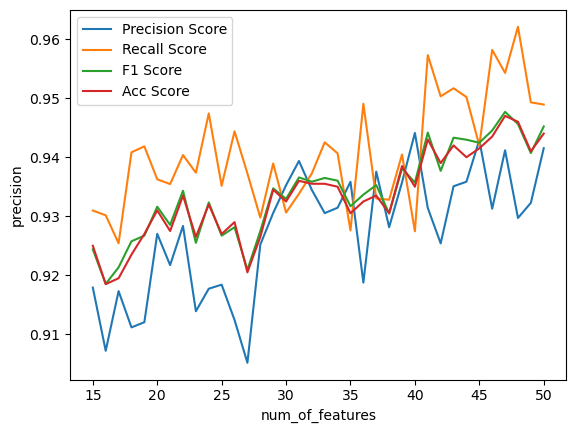

In [24]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score') 
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score') 
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

Training Random Forest Classifier

    Now we will use Random Forest Classification for training and try to beat the baseline set by logistic Regression

In [25]:
def train_rfc(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X=data[top_n_features]
    у=data['Label']

    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, shuffle=True)

    rfc= Rfc(n_estimators=500,
             max_depth=32, 
             max_features=1.0, 
            )

    rfc.fit(x_train, y_train)

    y_pred = rfc.predict(x_test)

    precision = precision_score(y_test, y_pred) 
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 
    accuracy = accuracy_score(y_test, y_pred)

    return precision, recall,f1,accuracy

In [26]:
arr=[]
for i in range(15,51,1):
    precision,recall,f1,accuracy=train_rfc(data,i)
    print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(i,precision,recall,f1,accuracy))
    arr.append([i,precision,recall,f1,accuracy])

performance for logistic Model with Top 15 features is precision :0.9789272030651341, recall :0.9826923076923076, f1 score :0.9808061420345489, accuracy :0.98
performance for logistic Model with Top 16 features is precision :0.9825462012320328, recall :0.9725609756097561, f1 score :0.9775280898876405, accuracy :0.978
performance for logistic Model with Top 17 features is precision :0.9797160243407708, recall :0.9747729566094854, f1 score :0.9772382397572079, accuracy :0.9775
performance for logistic Model with Top 18 features is precision :0.9799196787148594, recall :0.9779559118236473, f1 score :0.9789368104312939, accuracy :0.979
performance for logistic Model with Top 19 features is precision :0.9643564356435643, recall :0.9878296146044625, f1 score :0.9759519038076153, accuracy :0.976
performance for logistic Model with Top 20 features is precision :0.9739217652958877, recall :0.9827935222672065, f1 score :0.9783375314861461, accuracy :0.9785
performance for logistic Model with Top

In [27]:
df = pd.DataFrame(arr,columns=['num_of_features','precision','recall','f1_score','accuracy'])
df

,num_of_features,precision,recall,f1_score,accuracy
0,15,0.978927,0.982692,0.980806,0.9800
1,16,0.982546,0.972561,0.977528,0.9780
2,17,0.979716,0.974773,0.977238,0.9775
3,18,0.979920,0.977956,0.978937,0.9790
4,19,0.964356,0.987830,0.975952,0.9760
5,20,0.973922,0.982794,0.978338,0.9785
6,21,0.965517,0.986908,0.976096,0.9760
7,22,0.973735,0.985236,0.979452,0.9790
8,23,0.970854,0.983707,0.977238,0.9775
9,24,0.982759,0.979943,0.981349,0.9805


Visualizing Random Forest Performance

    Our goal is to beat logistic regression baseline which is 
    ACCURACY: 0.948869
    PRECISION: 0.947937
    RECALL: 0.948403
    F1_SCORE: 0.9475
    
    According to logistic regression best number of features for this model would be 44.	 			

<AxesSubplot:xlabel='num_of_features', ylabel='precision'>

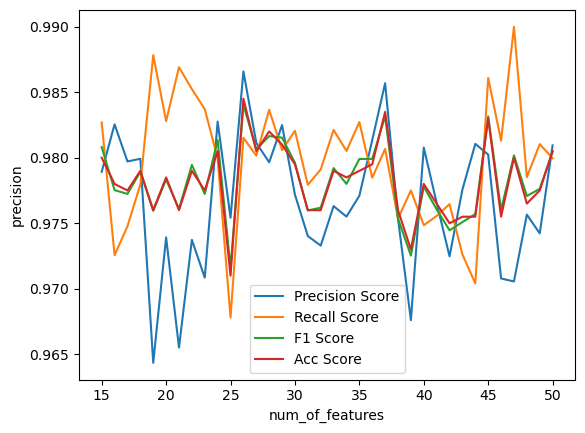

In [28]:
sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score') 
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score') 
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')

     Now by visualizing the figure above, we can conclude that the best number of features for this model would be 27, , the reason why I chose 27 is because that is the number of features that allowed the model to perform the best across all the evaluation metric	

.

FINAL RANDOM FOREST MODEL:

    Lets train the final random forest model based on the optimal N number of features

In [29]:
top_n_features = mi_scores.sort_values(ascending=False).head(27).index.tolist()
x = data[top_n_features]
y = data['Label']

x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=True)

rfc= Rfc(n_estimators=500,
         max_depth=32,
         max_features=1.0,
        )

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test,)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred) 
accuracy = accuracy_score(y_test,y_pred)

print("performance for logistic Model with Top {} features is precision :{}, recall :{}, f1 score :{}, accuracy :{}".format(27,precision,recall,f1,accuracy))

performance for logistic Model with Top 27 features is precision :0.9824902723735408, recall :0.9758454106280193, f1 score :0.9791565681047019, accuracy :0.9785


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       965
           1       0.98      0.98      0.98      1035

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

